In [1249]:
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [1250]:
warnings.filterwarnings('ignore')
# Read in our dataset
cancer_data = pd.read_csv('project1.csv')

In [1251]:
# Identify the shape of raw data
cancer_data.shape

(386, 10)

In [1252]:
# Identify the sie of raw data
cancer_data.size

3860

In [1253]:
# Get info about datatype
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [1254]:
# cast column vals to type category
cancer_data['class'] = cancer_data['class'].astype("category")
cancer_data['age'] = cancer_data['age'].astype("category")
cancer_data['menopause'] = cancer_data['menopause'].astype("category")
cancer_data['tumor-size'] = cancer_data['tumor-size'].astype("category")
cancer_data['inv-nodes'] = cancer_data['inv-nodes'].astype("category")
cancer_data['node-caps'] = cancer_data['node-caps'].astype("category")
cancer_data['breast'] = cancer_data['breast'].astype("category")
cancer_data['breast-quad'] = cancer_data['breast-quad'].astype("category")
cancer_data['irradiat'] = cancer_data['irradiat'].astype("category")

In [1255]:
# Check if any duplicate rows exist in the data 
cancer_data.duplicated().sum()

11

In [1256]:
# Treat duplicated rows
cancer_data = cancer_data.drop_duplicates()

In [1257]:
# Check to see if any missing data exists in the dataset
cancer_data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [1258]:
# Treating missing values from 'tumor-size' and 'inv-nodes' columns with the mode of the age group
cancer_data['tumor-size'] = cancer_data.groupby(['breast-quad'])['tumor-size'].transform(lambda x: x.fillna(x.mode()[0]))
cancer_data['inv-nodes'] = cancer_data.groupby(['breast-quad'])['inv-nodes'].transform(lambda x: x.fillna(x.mode()[0]))

Text(0.5, 1.0, 'Number of Tumor Size')

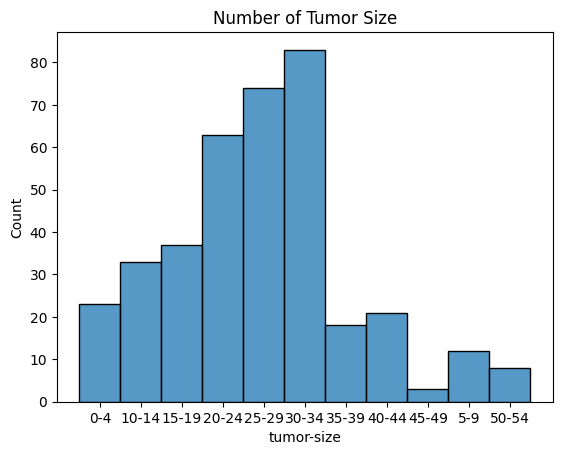

In [1259]:
# Histogram Counting the tumor size
sns.histplot(data=cancer_data['tumor-size'])
plt.title("Number of Tumor Size")

Text(0.5, 1.0, 'Number of Breast Quadrant')

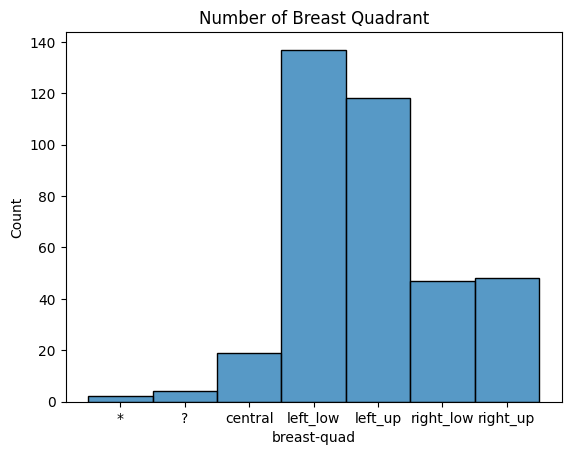

In [1260]:
# Histogram Counting the location of the tumor
sns.histplot(data=cancer_data['breast-quad'])
plt.title("Number of Breast Quadrant")

Text(0.5, 1.0, 'INV Nodes Distribution')

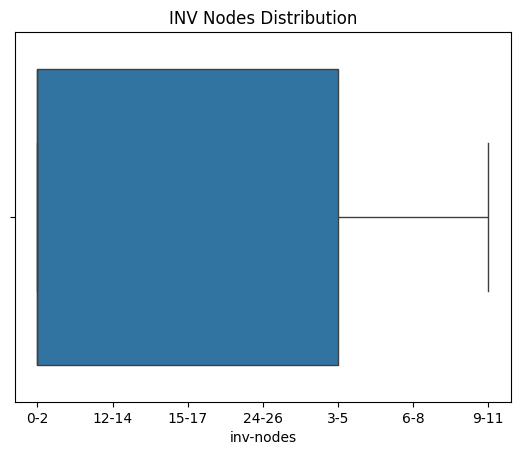

In [1261]:
# Box Plot for Inv-Nodes Column
sns.boxplot(data=cancer_data, x="inv-nodes")
plt.title("INV Nodes Distribution")

In [1262]:
# Performing One hot encoding on Categorical Columns
cancer_data = pd.get_dummies(cancer_data, columns=["class", "menopause", "age", "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "irradiat"], drop_first=True)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                375 non-null    int64
 1   class_recurrence-events  375 non-null    bool 
 2   menopause_lt40           375 non-null    bool 
 3   menopause_premeno        375 non-null    bool 
 4   age_30-39                375 non-null    bool 
 5   age_40-49                375 non-null    bool 
 6   age_50-59                375 non-null    bool 
 7   age_60-69                375 non-null    bool 
 8   age_70-79                375 non-null    bool 
 9   tumor-size_10-14         375 non-null    bool 
 10  tumor-size_15-19         375 non-null    bool 
 11  tumor-size_20-24         375 non-null    bool 
 12  tumor-size_25-29         375 non-null    bool 
 13  tumor-size_30-34         375 non-null    bool 
 14  tumor-size_35-39         375 non-null    bool 
 15  tumor-size_

In [1263]:
# Assigning subset of data as X and y 
X = cancer_data.drop('class_recurrence-events', axis=1)
y = cancer_data["class_recurrence-events"]

In [1264]:
# Linear Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
clf = SGDClassifier(loss="perceptron", alpha=0.1)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.1, loss='perceptron')

In [1265]:
# Accuracy for Linear Classification
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
accuracy_train = accuracy_score(y_train, clf.predict(X_train))

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}\n")

# Recall for Linear Classification
recall_test = recall_score(y_test, clf.predict(X_test), average='weighted')
recall_train = recall_score(y_train, clf.predict(X_train), average='weighted')

print(f"Test Recall: {recall_test:.4f}")
print(f"Train Recall: {recall_train:.4f}\n")

# Precision for Linear Classification
precision_test = precision_score(y_test, clf.predict(X_test), average='weighted')
precision_train = precision_score(y_train, clf.predict(X_train), average='weighted')

print(f"Test Precision: {precision_test:.4f}")
print(f"Train Precision: {precision_train:.4f}\n")

# F-1 Score for Linear Classification
f1_test = f1_score(y_test, clf.predict(X_test), average='weighted')
f1_train = f1_score(y_train, clf.predict(X_train), average='weighted')

print(f"Test F1 Score: {f1_test:.4f}")
print(f"Train F1 Score: {f1_train:.4f}\n")
print(classification_report(y_test, clf.predict(X_test)))



Test Accuracy: 0.5398
Train Accuracy: 0.6031

Test Recall: 0.5398
Train Recall: 0.6031

Test Precision: 0.6558
Train Precision: 0.7092

Test F1 Score: 0.5526
Train F1 Score: 0.6112

              precision    recall  f1-score   support

       False       0.78      0.46      0.58        78
        True       0.37      0.71      0.49        35

    accuracy                           0.54       113
   macro avg       0.58      0.59      0.54       113
weighted avg       0.66      0.54      0.55       113



In [1266]:
# Instantiate the model for K-Nearest Neighbor Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1267]:
# Accuracy for K-Nearest Neighbor Classifier
accuracy_test = accuracy_score(y_test, knn.predict(X_test))
accuracy_train = accuracy_score(y_train, knn.predict(X_train))

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}\n")

# Recall for K-Nearest Neighbor Classifier
recall_test = recall_score(y_test, knn.predict(X_test), average='weighted')
recall_train = recall_score(y_train, knn.predict(X_train), average='weighted')

print(f"Test Recall: {recall_test:.4f}")
print(f"Train Recall: {recall_train:.4f}\n")

# Precision for K-Nearest Neighbor Classifier
precision_test = precision_score(y_test, knn.predict(X_test), average='weighted')
precision_train = precision_score(y_train, knn.predict(X_train), average='weighted')

print(f"Test Precision: {precision_test:.4f}")
print(f"Train Precision: {precision_train:.4f}\n")

# F-1 Score for K-Nearest Neighbor Classifier
f1_test = f1_score(y_test, knn.predict(X_test), average='weighted')
f1_train = f1_score(y_train, knn.predict(X_train), average='weighted')

print(f"Test F1 Score: {f1_test:.4f}")
print(f"Train F1 Score: {f1_train:.4f}\n")

print(classification_report(y_test, knn.predict(X_test)))


Test Accuracy: 0.6460
Train Accuracy: 0.7672

Test Recall: 0.6460
Train Recall: 0.7672

Test Precision: 0.5988
Train Precision: 0.7592

Test F1 Score: 0.6100
Train F1 Score: 0.7575

              precision    recall  f1-score   support

       False       0.70      0.85      0.77        78
        True       0.37      0.20      0.26        35

    accuracy                           0.65       113
   macro avg       0.54      0.52      0.51       113
weighted avg       0.60      0.65      0.61       113



In [1268]:
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
best_knn = knn_gscv.best_estimator_

In [1269]:
knn_search_recall = KNeighborsClassifier()
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")
knn_gscv2.fit(X_train, y_train)
best_recall = knn_gscv2.best_estimator_

In [1270]:
# Recall for K-Nearest Neighbor Classifier using Grid search CV
models = [knn, best_knn, best_recall]
for m in models:

    recall_test=recall_score(y_test, m.predict(X_test), average='weighted')
    print(f'Recall of {m} on test data is : {recall_test}')
    recall_train=recall_score(y_train, m.predict(X_train), average='weighted')
    print(f'Recall of {m} on train data is : {recall_train}\n')

Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.6460176991150443
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.767175572519084

Recall of KNeighborsClassifier(n_neighbors=12) on test data is : 0.672566371681416
Recall of KNeighborsClassifier(n_neighbors=12) on train data is : 0.6870229007633588

Recall of KNeighborsClassifier(n_neighbors=1) on test data is : 0.5486725663716814
Recall of KNeighborsClassifier(n_neighbors=1) on train data is : 0.9885496183206107



In [1271]:
# Accuracy for K-Nearest Neighbor Classifier using Grid search CV
accuracy_test = accuracy_score(y_test, best_knn.predict(X_test))
accuracy_train = accuracy_score(y_train, best_knn.predict(X_train))

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Train Accuracy: {accuracy_train:.4f}\n")

# Precision for K-Nearest Neighbor Classifier using Grid search CV
precision_test = precision_score(y_test, best_knn.predict(X_test), average='weighted')
precision_train = precision_score(y_train, best_knn.predict(X_train), average='weighted')

print(f"Test Precision: {precision_test:.4f}")
print(f"Train Precision: {precision_train:.4f}\n")

# F-1 Score for K-Nearest Neighbor Classifier using Grid search CV
f1_test = f1_score(y_test, best_knn.predict(X_test), average='weighted')
f1_train = f1_score(y_train, best_knn.predict(X_train), average='weighted')

print(f"Test F1 Score: {f1_test:.4f}")
print(f"Train F1 Score: {f1_train:.4f}\n")

print(classification_report(y_test, best_knn.predict(X_test)))


Test Accuracy: 0.6726
Train Accuracy: 0.6870

Test Precision: 0.5524
Train Precision: 0.6600

Test F1 Score: 0.5696
Train F1 Score: 0.6223

              precision    recall  f1-score   support

       False       0.69      0.96      0.80        78
        True       0.25      0.03      0.05        35

    accuracy                           0.67       113
   macro avg       0.47      0.50      0.43       113
weighted avg       0.55      0.67      0.57       113

